In [2]:
%pwd

'/content'

In [3]:
%mkdir data
# the line below needs to be adapted if not running on google colab
%cd ./data/

/content/data


In [4]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2025-05-21 17:47:59--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-05-21 17:47:59--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-05-21 17:48:00--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [5]:
!tar zxvf images.tar.gz
!tar zxvf annotations.tar.gz

Streaming output truncated to the last 5000 lines.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian

In [6]:
%ls

annotations/  annotations.tar.gz  images/  images.tar.gz


#### Displaying image and its mask

In [7]:
import os

input_dir = "images"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(".jpg")]
)
print(len(input_img_paths))

target_paths = sorted(
    [os.path.join(target_dir, fname) for fname in os.listdir(target_dir) if fname.endswith(".png") and not fname.startswith(".")]
)
print(len(target_paths))

7390
7390


[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 ...

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  ...
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


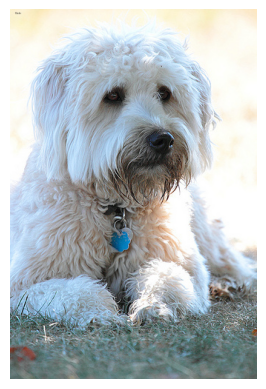

In [8]:
import matplotlib.pyplot as plt
import keras
from keras.utils import load_img, img_to_array
from keras import layers

plt.axis("off")
plt.imshow(load_img(input_img_paths[7000]))

img = img_to_array(load_img(target_paths[7000]))
print(img)



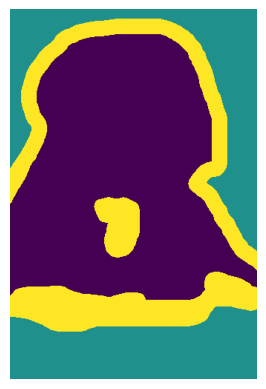

In [9]:
#We use color_mode="grayscale" so that the image we load is treated as having a single color channel.
def display_target(target_array):
    # The original labels are 1, 2, and 3. We subtract 1 so that the labels range from 0, 1, 2, and then we multiply by 127 so that the labels become 0 (black), 127 (gray), 254 (near-white)
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])
img = img_to_array(load_img(target_paths[7000], color_mode="grayscale"))
display_target(img)

In [10]:
import numpy as np
import random

img_size = (200, 200)
num_imgs = len(input_img_paths) # Total number of samples in the data

# Shuffle the file paths (they were originally sorted by breed).
#We use the same seed (1337) in both statements to ensure that the input paths and target paths stay in the same order.
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def convert_input_image_to_array(path):
    return img_to_array(
        load_img(path, target_size=img_size)
    )

def convert_target_trimap_to_array(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale")
    )
    img = img.astype("uint8") - 1 # Subtract 1 so that our labels become 0, 1, and 2
    return img

# Load all images in the input_imgs float32 array and their masks in the targets uint8 array (same order).
# The inputs have three channels (RBG values) and the targets have a single channel (which contains integer labels).
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

for i in range(num_imgs):
    input_imgs[i] = convert_input_image_to_array(input_img_paths[i])
    targets[i] = convert_target_trimap_to_array(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]


In [11]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs) # rescale input images in 0-1 range

    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)

    # 1 (foreground) 2 (background) 3 (contour)
    # We end the model with a per-pixel three-way softmax to classify each output pixel into one of our three categories.
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    model = keras.Model(inputs, outputs)
    return model

In [12]:
model = get_model(img_size=img_size, num_classes=3)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 100, 100, 128)  │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 200, 200, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

#### The first half of the model, similar to image classification convnets, uses a stack of Conv2D layers with increasing filter sizes to downsample images three times by a factor of two, resulting in activations of (25, 25, 256). Its purpose is to encode images into smaller feature maps, essentially compressing them while retaining information about large spatial chunks of the original image.

#### A key difference from typical classification models is the downsampling method. Instead of MaxPooling2D layers, this model uses strides in alternating convolution layers. This is because image segmentation requires precise spatial location information to produce per-pixel target masks. While max pooling destroys location information within each pooling window, strided convolutions maintain it better, making them more suitable for tasks that depend on feature location. Models that prioritize feature location, like generative models, often use strides instead of max pooling.

#### The second half of the model utilizes Conv2DTranspose layers to upsample the feature maps. Since the first half of the model compresses images into (25, 25, 256) feature maps, and the desired output (target masks) is (200, 200, 3), Conv2DTranspose layers perform the inverse operation of downsampling. They effectively learn to expand the spatial dimensions of the feature maps. For example, a Conv2D layer with strides=2 might reduce a (100, 100, 64) input to (50, 50, 128), and applying a corresponding Conv2DTranspose layer with strides=2 would restore it back to (100, 100, 64). This allows the model to reconstruct the original image dimensions from the compressed feature maps.

In [13]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("image_segmentation.keras",
    save_best_only=True)
]

history = model.fit(
    train_input_imgs,
    train_targets,
    epochs=50,
    callbacks=callbacks,
    batch_size=64,
    validation_data=(val_input_imgs, val_targets)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - loss: 0.9758 - val_loss: 0.9122
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 537ms/step - loss: 0.9019 - val_loss: 0.8788
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 561ms/step - loss: 0.8438 - val_loss: 0.8127
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 559ms/step - loss: 0.8187 - val_loss: 0.7834
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 539ms/step - loss: 0.7809 - val_loss: 0.7556
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 537ms/step - loss: 0.7723 - val_loss: 0.7917
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 560ms/step - loss: 0.7545 - val_loss: 0.7236
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 529ms/step - loss: 0.7422 - val_loss: 0.7047
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 557ms/step - loss: 0.7235 - val_loss: 0.7245
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 564ms/step - loss: 0.7145 - val_loss: 0.7576
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 540ms/step - loss: 0.6975 - val_loss: 0.7684
Epoch 12/50
100/100 ━

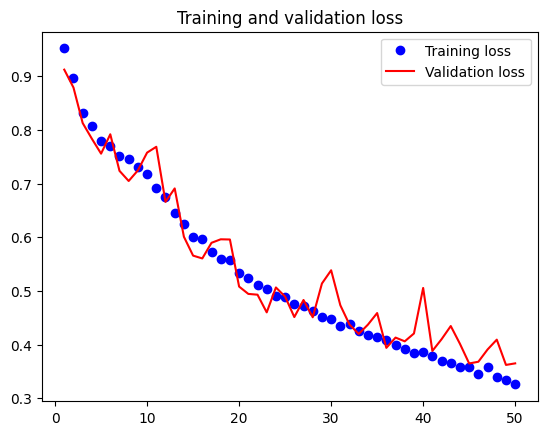

In [14]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [17]:
%pwd

'/content/data'

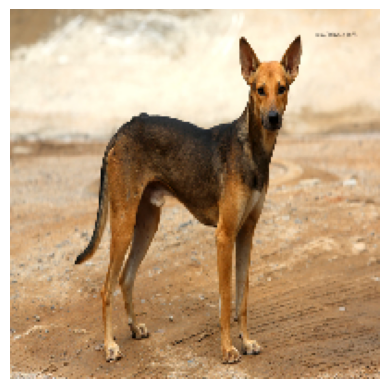

In [18]:
from keras.utils import array_to_img
model = keras.models.load_model("image_segmentation.keras")

test_image = img_to_array(load_img("../dog.jpg", target_size=img_size))
plt.axis("off")
plt.imshow(array_to_img(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


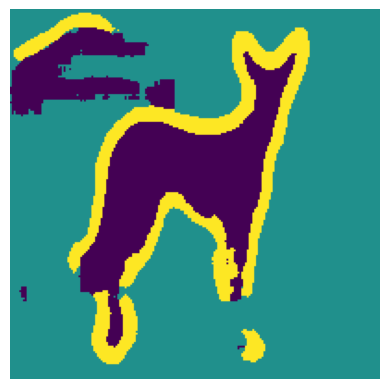

In [19]:
mask = model.predict(np.expand_dims(test_image, 0))[0]
def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)